In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [2]:
file = 'Data/InterpolacionLagrange.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Interpolacion.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

--File found---


In [3]:
Data = pd.read_csv(Path_,sep=',')

In [4]:
Data

,X,Y
0,5,10
1,10,15
2,15,25


In [24]:
X = np.array([5,10,15,55,60])
Y = np.array([10,15,25,30,25])

In [25]:
#X = np.float64(Data['X'])
#Y = np.float64(Data['Y'])

In [26]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [27]:
def Poly(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
        
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [30]:
x = np.linspace(5,60,100)
y = Poly(x,X,Y)

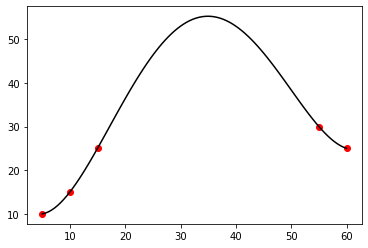

In [31]:
plt.scatter(X,Y,color='r')
plt.plot(x,y,color='k')

In [32]:
y1 = np.interp(x,X,Y)

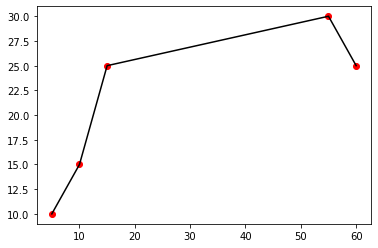

In [33]:
plt.scatter(X,Y,color='r')
plt.plot(x,y1,color='k')

In [34]:
x = sym.Symbol('x')
f = Poly(x,X,Y)

In [35]:
f

10*(12/11 - x/55)*(11/10 - x/50)*(3/2 - x/10)*(2.0 - 0.2*x) + 15*(6/5 - x/50)*(11/9 - x/45)*(3 - x/5)*(0.2*x - 1.0) + 25*(4/3 - x/45)*(11/8 - x/40)*(0.1*x - 0.5)*(x/5 - 2) + 30*(12 - x/5)*(0.02*x - 0.1)*(x/45 - 2/9)*(x/40 - 3/8) + 25*(0.0181818181818182*x - 0.0909090909090909)*(x/50 - 1/5)*(x/45 - 1/3)*(x/5 - 11)

In [36]:
f = sym.expand(f)
f

5.75757575757577e-5*x**4 - 0.00772727272727273*x**3 + 0.295833333333334*x**2 - 2.19318181818182*x + 14.5